# **Matrices de Desplazamiento y Rotacion Masiva en un espacio tridimensional**

**Estudiantes:** Diego Alzate, Aris Avila y Julieth Gutierrez
**Grupo 5**

**Diseño de prototipos - 2025 I**
**INFOTEP**

In [ ]:
import numpy as np
from sympy import*
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
init_printing()

# **Función dibujar un vector punto en un espacio tridimencional**

In [ ]:
def dibujar_punto(punto, label, x_lim = [0, 1], y_lim=[0, 1], z_lim=[0, 1]):
  """
  Dibuja un punto en un espacio tridimensional.

  Parametros:
    punto: Un vector NumPy de tres elementos representando las coordenadas (x, y, z) del punto.
    label: Una cadena de texto para etiquetar el punto en el gráfico.
    x_lim: Una lista de dos elementos que define los límites del eje x.
    y_lim: Una lista de dos elementos que define los límites del eje y.
    z_lim: Una lista de dos elementos que define los límites del eje z.
  """

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(punto[0], punto[1], punto[2], color='b', label=label)

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Espacio 3D')

  ax.quiver(0, 0, 0, punto[0], punto[1], punto[2], color='b')

  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  ax.set_zlim(z_lim)
  ax.legend()
  plt.show()

**desplazamiento_masivo**

In [ ]:
def rotacion_masiva(punto_inicial, vector_rotaciones):
    """
    Realiza una rotación masiva de un punto en un espacio tridimensional utilizando una lista de rotaciones sobre los ejes X, Y y Z.

    Parámetros:
    ----------
    punto_inicial : list o np.array
        Un vector NumPy o lista de tres elementos representando las coordenadas (x, y, z) del punto inicial.

    vector_rotaciones : list
        Una lista de tuplas, donde cada tupla contiene un valor de rotación (en grados) y el eje sobre el que se realiza la rotación ('x', 'y', 'z').
        Ejemplo: [(180, 'x'), (180, 'y'), (180, 'z')]
    """

    punto_final = punto_inicial  # Inicializa el punto final como el punto inicial

    for grado, eje in vector_rotaciones:
        convertidor = GradosARadianes(grado)
        radianes = convertidor.convertir_a_radianes()
        theta_val = radianes

        if eje == 'x':
            R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64)  # Convierte theta simbólico a un valor concreto Rx
            P0_rotado_x = np.dot(R_x_p0, punto_final)  # Producto punto entre la matriz de rotación y el vector de posición del punto
            dibujar_punto(P0_rotado_x, label='Rotacion X', x_lim=[-3, 3], y_lim=[-3, 3])
            punto_final = P0_rotado_x
            print(punto_final)

        if eje == 'y':
            R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64)  # Convierte theta simbólico a un valor concreto Ry
            P0_rotado_y = np.dot(R_y_p0, punto_final)  # Producto punto entre la matriz de rotación y el vector de posición del punto
            dibujar_punto(P0_rotado_y, label='Rotacion Y', x_lim=[-3, 3], y_lim=[-3, 3])
            punto_final = P0_rotado_y
            print(punto_final)

        if eje == 'z':
            R_z_p0 = np.array(R_z.subs({theta: theta_val})).astype(np.float64)  # Convierte theta simbólico a un valor concreto Rz
            P0_rotado_z = np.dot(R_z_p0, punto_final)  # Producto punto entre la matriz de rotación y el vector de posición del punto
            dibujar_punto(P0_rotado_z, label='Rotacion Z', x_lim=[-3, 3], y_lim=[-3, 3])
            punto_final = P0_rotado_z
            print(punto_final)


**desplazamiento_masivo**

In [ ]:
def desplazamiento_masivo(punto_inicial, vector_desplazamientos):
    """
    Esta función aplica una serie de desplazamientos secuenciales a un punto en función de una lista de desplazamientos
    especificados en un vector. Cada desplazamiento tiene una dirección (eje) y una distancia. El punto final después de
    aplicar todos los desplazamientos será devuelto.

    Parámetros:
    ----------
    punto_inicial : list o np.array
        Un vector NumPy o lista de tres elementos representando las coordenadas (x, y, z) del punto inicial.

    vector_desplazamientos : list
        Una lista de tuplas donde cada tupla contiene un valor de desplazamiento y un eje de desplazamiento.
        Ejemplo: [(1, 'x'), (2, 'y'), (-1, 'x')]
    """

    punto_final = punto_inicial  # Inicializa el punto final como el punto inicial

    for valor, eje in vector_desplazamientos:
        # Aplica el desplazamiento usando la función 'mover_punto' definida previamente
        PN = mover_punto(punto_final, eje, valor)
        dibujar_punto(PN, "Punto Nuevo", x_lim=[-3, 3], y_lim=[-3, 3])
        punto_final = PN
        print(punto_final)

**transformacion_masiva**

In [ ]:
def transformacion_masiva(punto_inicial, vector_transformaciones):
    """
    Realiza una transformación masiva de un punto en un espacio tridimensional, aplicando una serie de rotaciones y traslaciones.

    Parámetros:
    ----------
    punto_inicial : list o np.array
        Un vector NumPy o lista de tres elementos representando las coordenadas (x, y, z) del punto inicial.

    vector_transformaciones : list
        Una lista de tuplas donde cada tupla contiene un valor de rotación/traslación (en grados o unidades) y el eje correspondiente
        ('x', 'y', 'z'), junto con la acción ('𝑟𝑜𝑡𝑎𝑐𝑖o𝑛' o '𝑡𝑟𝑎𝑛𝑠𝑙𝑎𝑐𝑖𝑜𝑛').
        Ejemplo: [(180, 'x', '𝑟𝑜𝑡𝑎𝑐𝑖o𝑛'), (180, 'y', '𝑟𝑜𝑡𝑎𝑐𝑖o𝑛'), (180, 'z', '𝑟𝑜𝑡𝑎𝑐𝑖o𝑛'), (2, 'x', '𝑡𝑟𝑎𝑛𝑠𝑙𝑎𝑐𝑖o𝑛')

    """

    punto_final = punto_inicial  # Inicializa el punto final como el punto inicial

    for valor, eje, accion in vector_transformaciones:
        # Convierte el valor de rotación a radianes si es necesario
        convertidor = GradosARadianes(valor)
        radianes = convertidor.convertir_a_radianes()
        theta_val = radianes

        if accion == 'rotacion':
            # Aplica la rotación correspondiente sobre el eje
            if eje == 'x':
                R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64)  # Convierte theta simbólico a un valor concreto Rx
                P0_rotado_x = np.dot(R_x_p0, punto_final)  # Producto punto entre la matriz de rotación y el vector de posición del punto
                dibujar_punto(P0_rotado_x, label='Rotacion X', x_lim=[-3, 3], y_lim=[-3, 3])
                punto_final = P0_rotado_x
                print(punto_final)

            elif eje == 'y':
                R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64)  # Convierte theta simbólico a un valor concreto Ry
                P0_rotado_y = np.dot(R_y_p0, punto_final)  # Producto punto entre la matriz de rotación y el vector de posición del punto
                dibujar_punto(P0_rotado_y, label='Rotacion Y', x_lim=[-3, 3], y_lim=[-3, 3])
                punto_final = P0_rotado_y
                print(punto_final)

            elif eje == 'z':
                R_z_p0 = np.array(R_z.subs({theta: theta_val})).astype(np.float64)  # Convierte theta simbólico a un valor concreto Rz
                P0_rotado_z = np.dot(R_z_p0, punto_final)  # Producto punto entre la matriz de rotación y el vector de posición del punto
                dibujar_punto(P0_rotado_z, label='Rotacion Z', x_lim=[-3, 3], y_lim=[-3, 3])
                punto_final = P0_rotado_z
                print(punto_final)

        if accion == 'desplazamiento':
            # Aplica la traslación correspondiente sobre el eje
            PN = mover_punto(punto_final, eje, valor)
            dibujar_punto(PN, "Punto Nuevo", x_lim=[-3, 3], y_lim=[-3, 3])
            punto_final = PN
            print(punto_final)

**mover_punto**

In [ ]:
def mover_punto(punto, eje, distancia):
    """
    Mueve un punto en un espacio tridimensional a lo largo de un eje especificado.

    Parámetros:
      punto: Un vector NumPy de tres elementos representando las coordenadas (x, y, z) del punto.
      eje: Un string que especifica el eje en el que se mueve el punto ('x', 'y', 'z').
      distancia: Un número que indica la distancia a mover en el eje dado.
                Si la cantidad es positiva, el punto se moverá en la dirección positiva del eje.
                Si la cantidad es negativa, se moverá en la dirección negativa del eje.

    Retorna:
      Un nuevo vector NumPy con la nueva posición del punto.
    """
    nuevo_punto = np.array(punto)  # Copia el punto original

    if eje == 'x':
        nuevo_punto[0] += distancia
    elif eje == 'y':
        nuevo_punto[1] += distancia
    elif eje == 'z':
        nuevo_punto[2] += distancia
    else:
        raise ValueError("Eje no válido. Use 'x', 'y' o 'z'.")

    return nuevo_punto

# **Convertir un numero en grado a Radianes**



In [ ]:
class GradosARadianes:
    """
    Convierte un valor en grados a radianes.

    Parametros:
        grados: Un número que representa el valor en grados a convertir.

    Métodos:
        convertir_a_radianes(): Convierte el valor en grados a radianes y lo retorna.
    """

    def __init__(self, grados):
        """
        Inicializa la clase con el valor en grados.

        Parametros:
            grados: Un número que representa el valor en grados.
        """
        self.grados = grados

    def convertir_a_radianes(self):
        """
        Convierte el valor almacenado en grados a radianes.

        Retorna:
            float: El valor equivalente en radianes.
        """
        return math.radians(self.grados)

In [ ]:
## Angulo simbolico
theta = symbols("theta",  real=True)

### **Rotación en el eje x**


In [ ]:
## Matrix de rotación simbolica sobre le eje X
R_x = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
R_x

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

### **Rotación en el eje y**



In [ ]:
R_y = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
R_y

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

### **Rotación en el eje z**

In [ ]:
R_z = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
R_z

⎡cos(θ)  -sin(θ)  0⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

**DESARROLLO DE LA ACTIVA:**

**Importante:**

1. Se creo una clase para convertir los radios en radianes.
2. En desplazamiento el numero es la distancia eje:2, y se toma en cm.
3. En desplazamiento si la distancia es negativa o positiva ayudara a identificar la direccion, asi como se muestra abajo.

Eje X (horizontal, izquierda-derecha):

*   X positivo: Se mueve hacia la derecha (en el sentido positivo del eje X).
*   X negativo: Se mueve hacia la izquierda (en el sentido negativo del eje X).

Eje Y (horizontal, adelante-atrás):

*   Y positivo: Se mueve hacia delante (en el sentido positivo del eje Y).
*   Y negativo: Se mueve hacia atrás (en el sentido negativo del eje Y).
  
Eje Z (vertical, arriba-abajo):

*   Z positivo: Se mueve hacia arriba (en el sentido positivo del eje Z).
*   Z negativo: Se mueve hacia abajo (en el sentido negativo del eje Z).

# **Cordenas inicial del punto (X, Y, Z)**

In [ ]:
P0 = np.array([1, 1, 0])
print(P0)

[1 1 0]


**Se dibuja el punto para ver como esta inicialmente.**

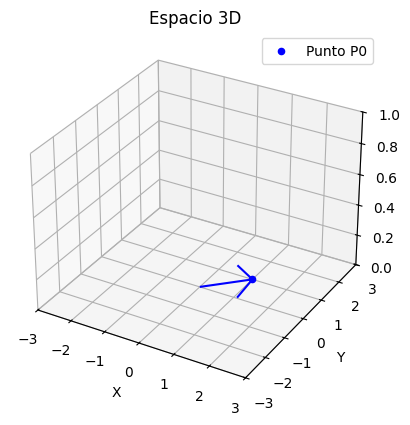

In [ ]:
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# **Rotación Masiva**

# **Experimento 1** con 180° en x , 180° en y 180° en Z

**Prueba 1 (x,z,y)**

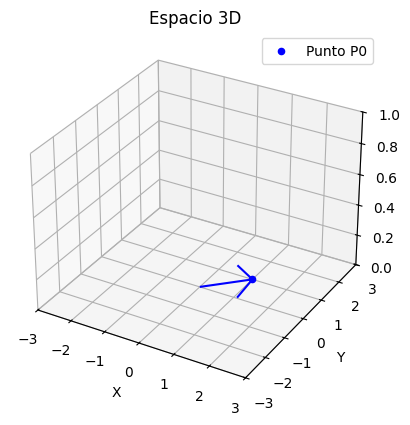

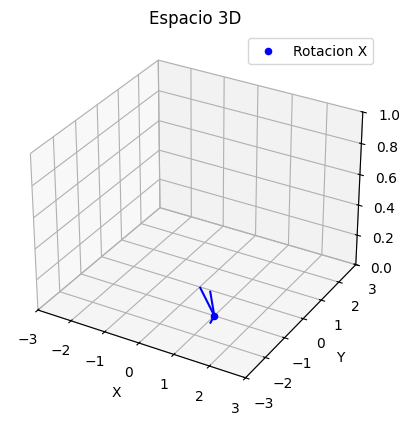

[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]


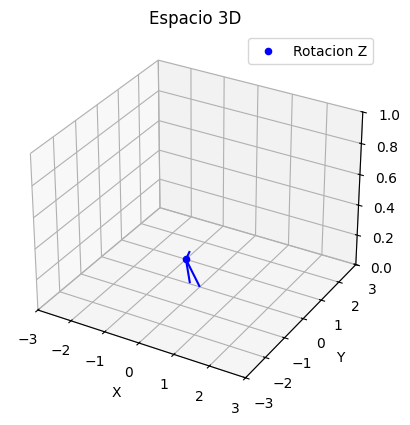

[-1.0000000e+00  1.0000000e+00  1.2246468e-16]


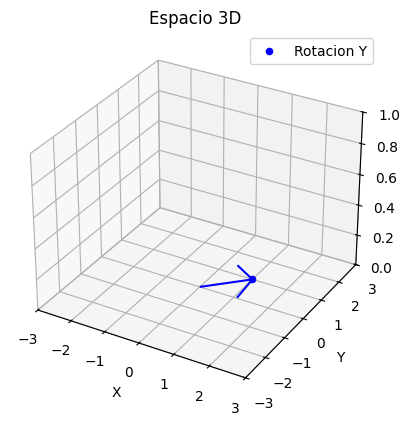

[ 1.00000000e+00  1.00000000e+00 -2.46519033e-32]


In [ ]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene rotaciones y el eje
vector_transformaciones = [(180, 'x'), (180, 'z'), (180, 'y')]

# Llamamos a la función rotacion_masiva y le pasamos por parametros el punto inicial y el vector con los angulos y ejes a rotar
rotacion_masiva(P0, vector_transformaciones)

**Prueba 2 (x, y, z)**

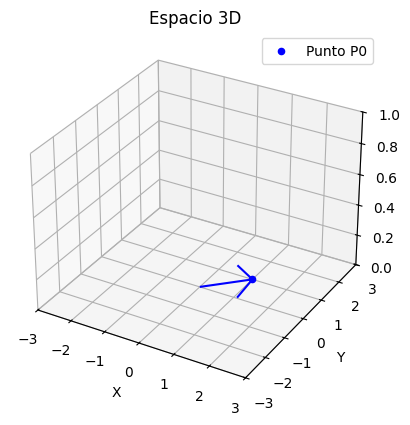

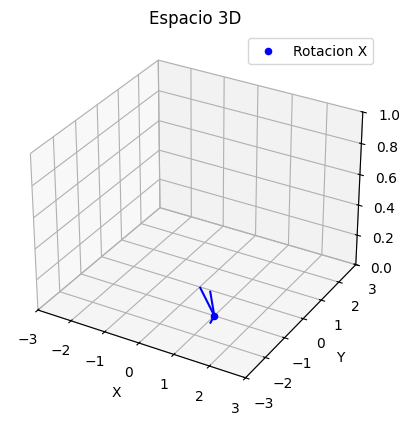

[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]


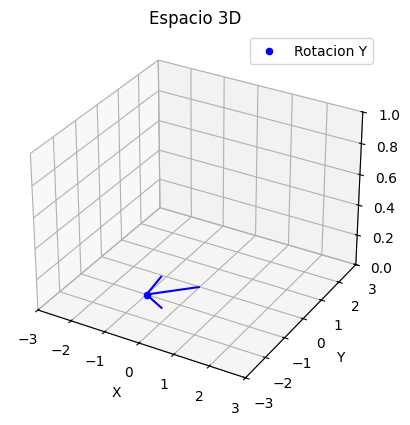

[-1.0000000e+00 -1.0000000e+00 -2.4492936e-16]


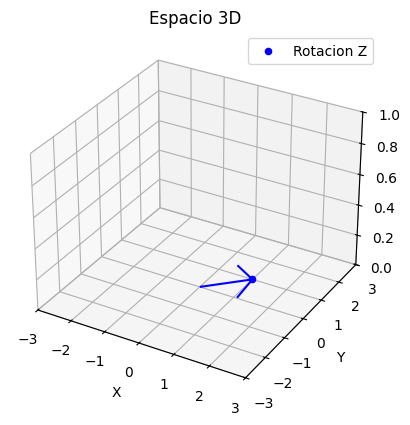

[ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


In [ ]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene rotaciones y el eje
vector_transformaciones = [(180, 'x'), (180, 'y'), (180, 'z')]

# Llamamos a la función rotacion_masiva y le pasamos por parametros el punto inicial y el vector con los angulos y ejes a rotar
rotacion_masiva(P0, vector_transformaciones)

**Prueba 3 (z, y, x)**

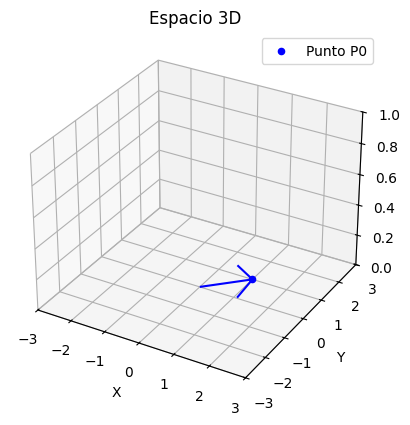

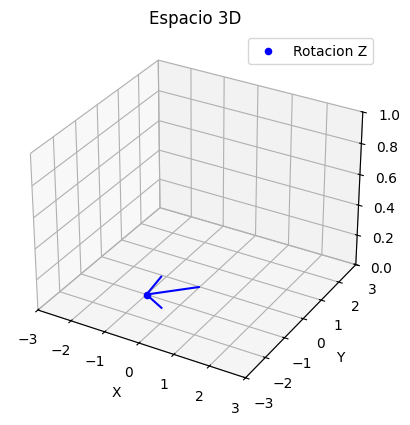

[-1. -1.  0.]


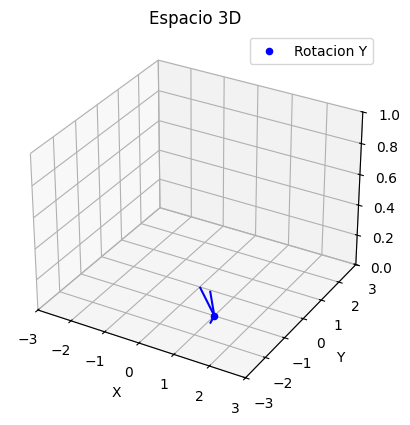

[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]


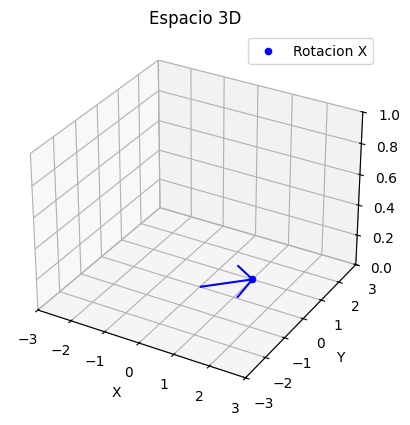

[ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


In [43]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene rotaciones y el eje
vector_transformaciones = [(180, 'z'), (180, 'y'), (180, 'x')]

# Llamamos a la función rotacion_masiva y le pasamos por parametros el punto inicial y el vector con los angulos y ejes a rotar
rotacion_masiva(P0, vector_transformaciones)

**Observación del experimento 1:**  Luego de realizado tres prueba, donde se hicieron operaciones conmutativa en los ejes. (X, Y y Z) con el grado 180, hemos visto que sin importar el orden el punto final siempre se ubica en la misma posición.

Cabe recalcar que es algo que sucede solo cunado el grado es de 180.

# **Experimento 2** con 30° en x , 55° en y 60° en Z

**Prueba 1 (x, y z)**

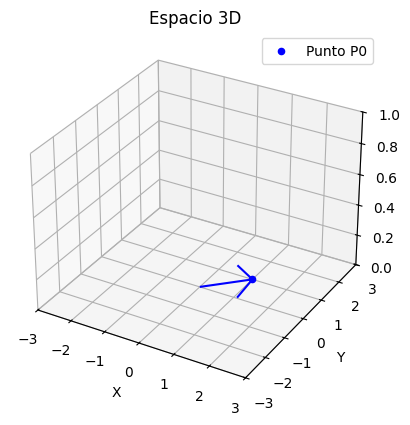

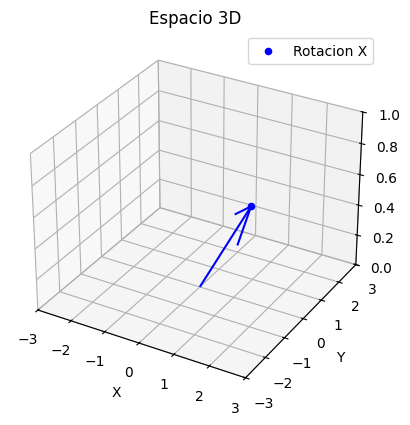

[1.        0.8660254 0.5      ]


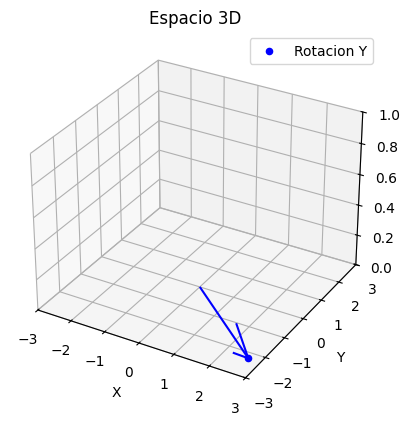

[ 0.98315246  0.8660254  -0.53236383]


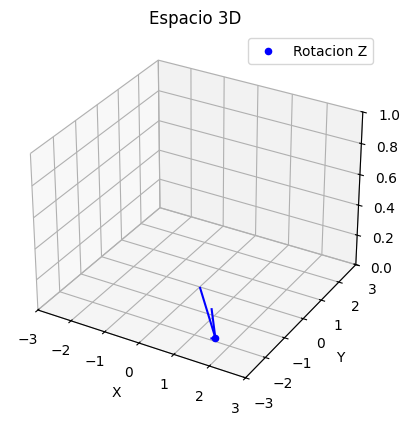

[-0.25842377  1.28444771 -0.53236383]


In [45]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene rotaciones y el eje
vector_transformaciones = [(30, 'x'), (55, 'y'), (60, 'z')]

# Llamamos a la función rotacion_masiva y le pasamos por parametros el punto inicial y el vector con los angulos y ejes a rotar
rotacion_masiva(P0, vector_transformaciones)

**Prueba 2 (y, x, z)**

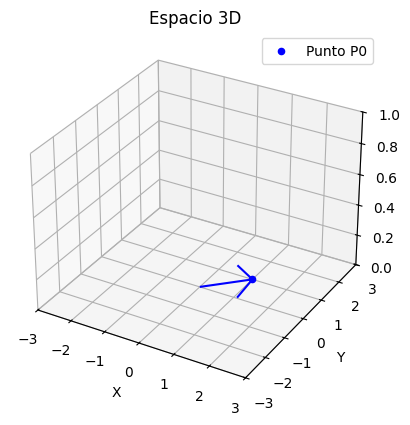

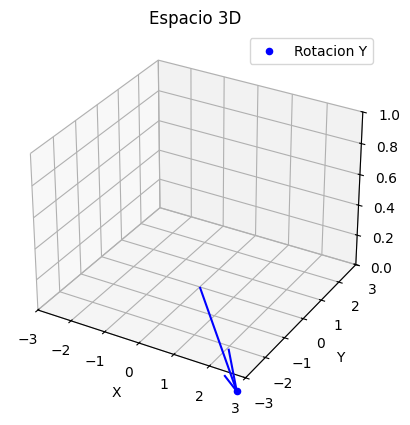

[ 0.57357644  1.         -0.81915204]


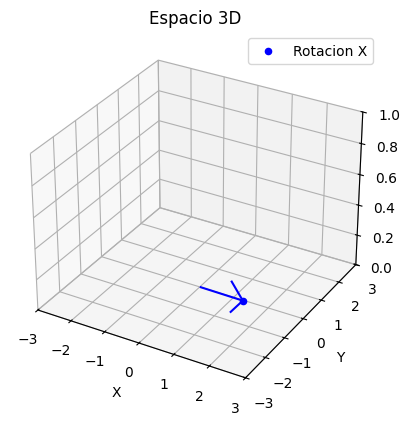

[ 0.57357644  1.27560143 -0.20940648]


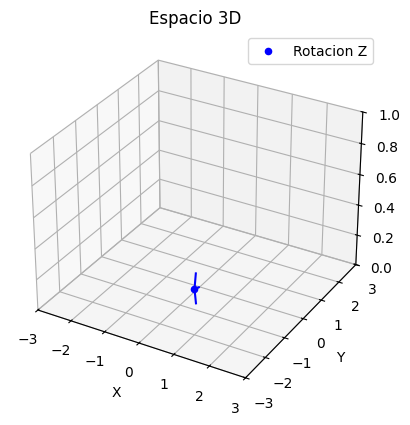

[-0.81791502  1.13453248 -0.20940648]


In [46]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene rotaciones y el eje
vector_transformaciones = [ (55, 'y'), (30, 'x'), (60, 'z')]

# Llamamos a la función rotacion_masiva y le pasamos por parametros el punto inicial y el vector con los angulos y ejes a rotar
rotacion_masiva(P0, vector_transformaciones)

Prueba 3 (z, y, x)

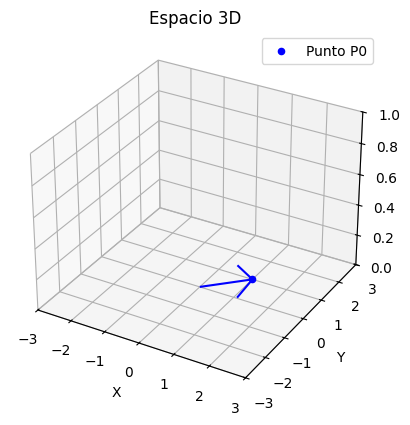

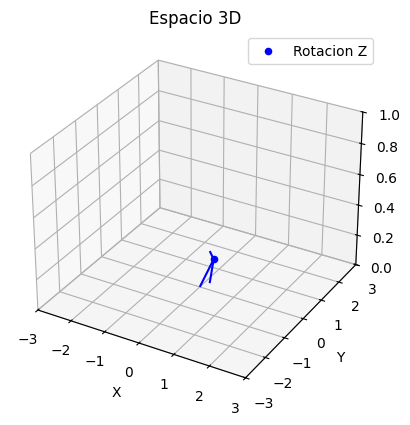

[-0.3660254  1.3660254  0.       ]


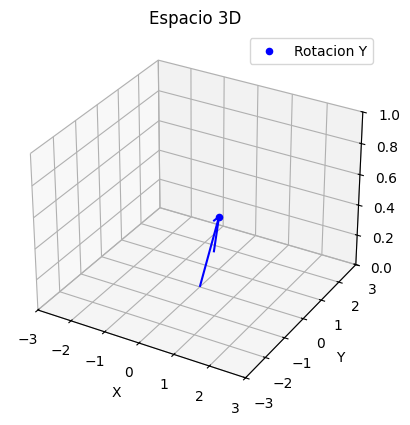

[-0.20994355  1.3660254   0.29983046]


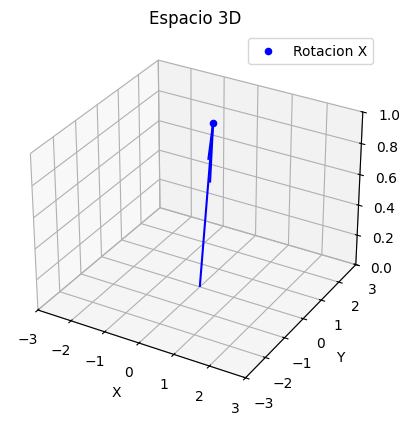

[-0.20994355  1.03309747  0.9426735 ]


In [47]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene rotaciones y el eje
vector_transformaciones = [(60, 'z'),(55, 'y'), (30, 'x')]

# Llamamos a la función rotacion_masiva y le pasamos por parametros el punto inicial y el vector con los angulos y ejes a rotar
rotacion_masiva(P0, vector_transformaciones)

**Observacion del experimento 2:** Como se menciono al inicio de este experimento, se hicieron prueba con los siguietes grados: con 30° en x , 55° en y 60° en Z.

Los resultados obtenido en cada prueba fue totalmente diferente, el resultado final donde se ubico el punto si cambio, incluso desde la primera rotacion, afectaba el resto de las rotaciones (donde iba a quedar el punto).
Entonces podemos decir que las operaciones conmutativa, cuando el grado es diferente a 180° el resultado final si se ve variado.

# **Desplazamientos Masivos**

# **Experimento 1** Se va a desplazar: 2 en x, 1 en y Y en z 1.

**Prueba 1 (x, y, z)** **

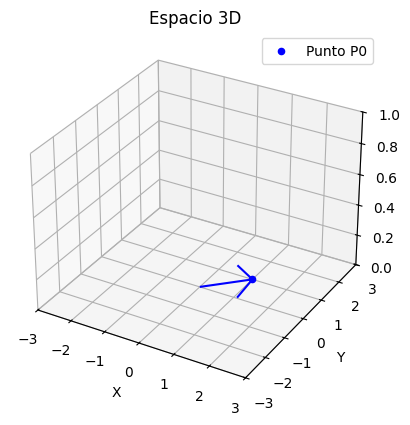

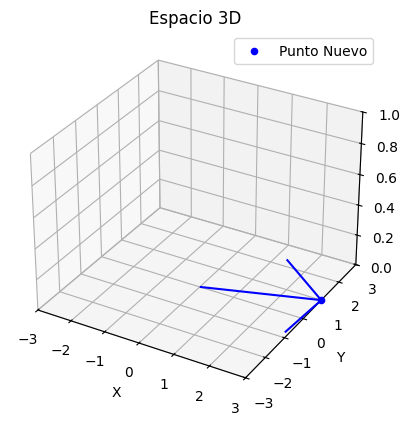

[3 1 0]


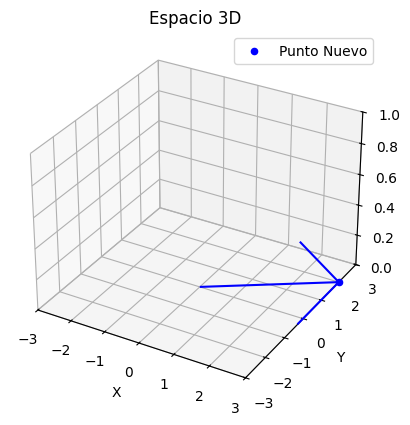

[3 2 0]


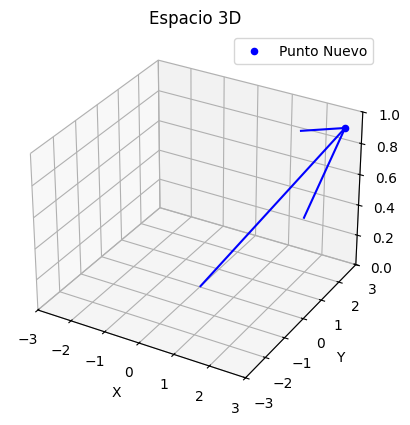

[3 2 1]


In [49]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene el desplazamiento y el eje
vector_transformaciones = [(2, 'x'), (1, 'y'), (1, 'z')]

# Llamamos a la función transformacion_masiva y se le manda por parametros el punto inicial y el vector con las distancia y ejex
desplazamiento_masivo(P0, vector_transformaciones)

**Prueba 2 (y, z, x)**

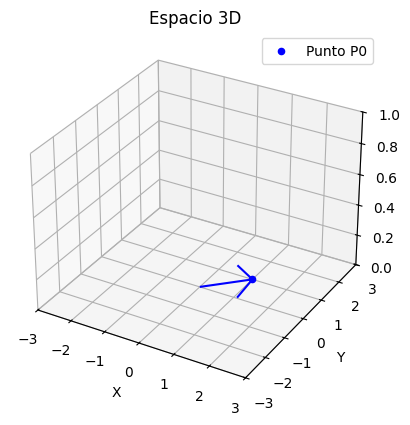

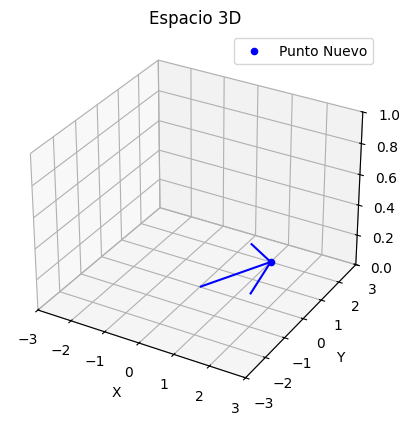

[1 2 0]


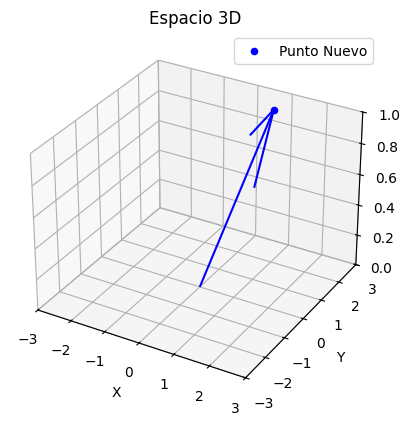

[1 2 1]


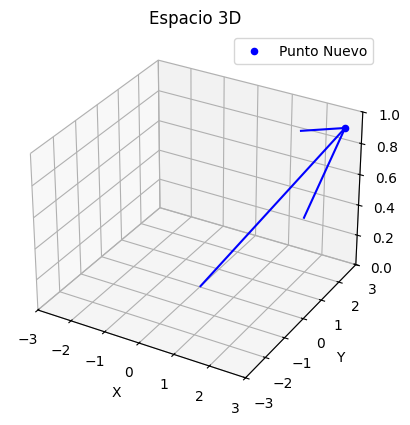

[3 2 1]


In [50]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene el desplazamiento y el eje
vector_transformaciones = [ (1, 'y'), (1, 'z'), (2, 'x')]

# Llamamos a la función transformacion_masiva y se le manda por parametros el punto inicial y el vector con las distancia y ejex
desplazamiento_masivo(P0, vector_transformaciones)

# **Experimento 2** Se va a desplazar: 1 en x, 2 en y Y en x 1 nuevamente.

**prueba 1 (x, y, x)**

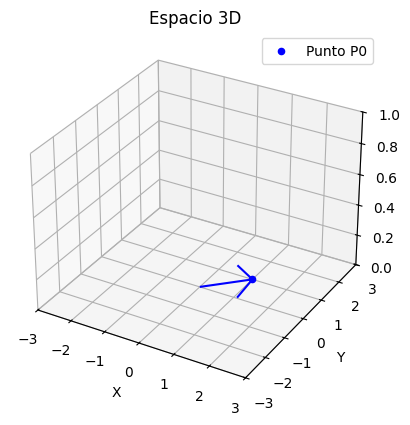

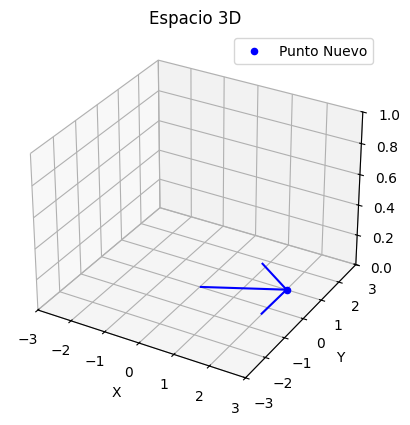

[2 1 0]


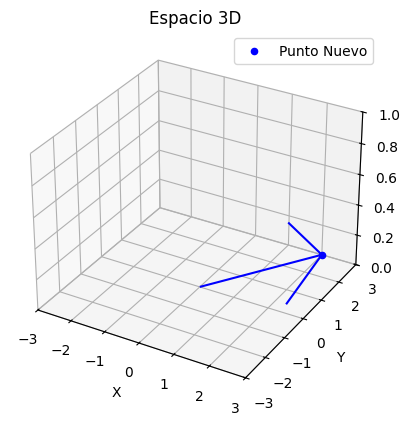

[2 3 0]


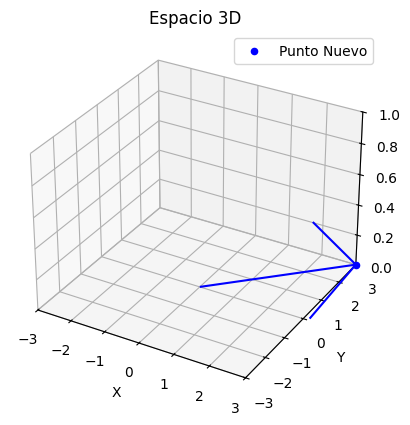

[3 3 0]


In [53]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene el desplazamiento y el eje
vector_transformaciones = [ (1, 'x'), (2, 'y'), (1, 'x')]

# Llamamos a la función transformacion_masiva y se le manda por parametros el punto inicial y el vector con las distancia y ejex
desplazamiento_masivo(P0, vector_transformaciones)

**Prueba 2 (x, x, y)**

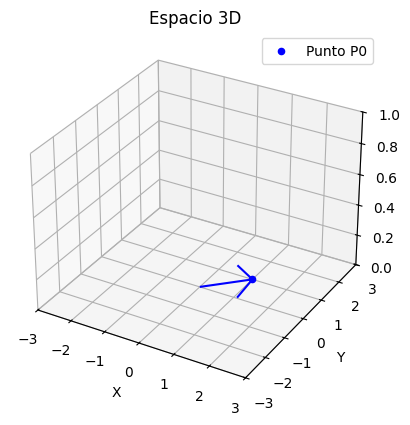

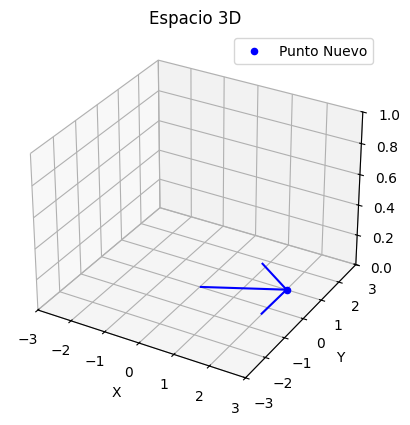

[2 1 0]


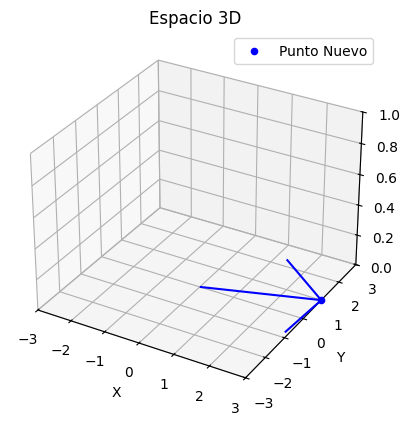

[3 1 0]


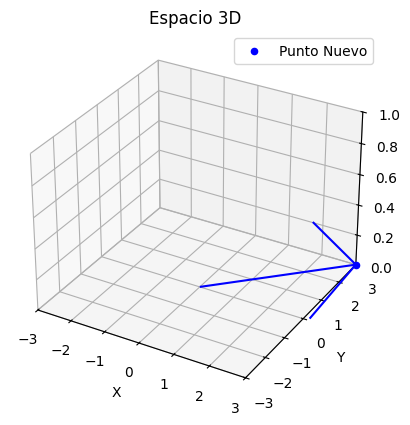

[3 3 0]


In [54]:
#Graficamos el punto inicial. para asi sabe donde comienza el punto
dibujar_punto(P0, "Punto P0", y_lim=[-3,3], x_lim=[-3,3])

# Definimos el vector de transformaciones que contiene el desplazamiento y el eje
vector_transformaciones = [ (1, 'x'), (1, 'x'), (2, 'y')]

# Llamamos a la función transformacion_masiva y se le manda por parametros el punto inicial y el vector con las distancia y ejex
desplazamiento_masivo(P0, vector_transformaciones)

**Observación experimento 2:** En el caso del desplazamiento el punto, podemos observar que el resultado del punto final sin importar el orden de los ejes el punto terminara en la misma posicion.
Pues eso se debe que al final termina siendo como una suma, sin importar el orden que se haga el resultado es el mismo

# **Transformación Masiva**

Codigo de uso de transformacio maxiva, se deja como ejemplo de uso

[1, 1, 0]


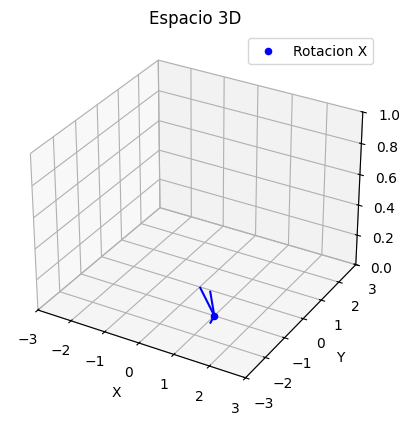

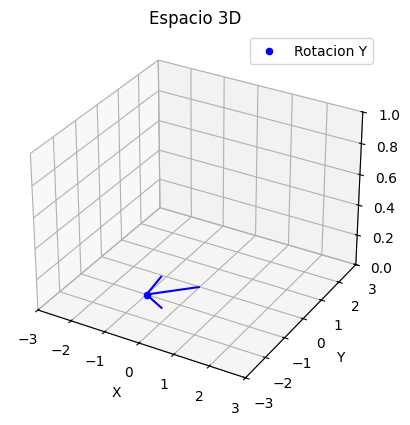

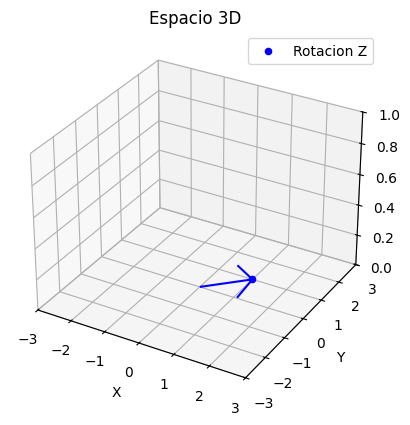

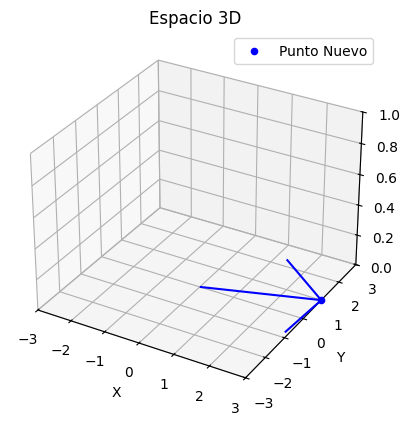

[ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


In [ ]:
# Definimos el vector de transformaciones que contiene desplazamiento y rotacion
vector_transformaciones = [(180, 'x', 'rotacion'), (180, 'y','rotacion'), (180, 'z','rotacion'), (2, 'x','desplazamiento')]

# Llamamos a la función transformacion_masiva y se le pasa el punto inicial y el vector que contiene las transformaciones
transformacion_masiva(P0, vector_transformaciones)